In [449]:
import cv2, string, os, sys
print(os.listdir('../../'))
print(os.getcwd())
sys.path.append("../")
sys.path.append("../src/network")
sys.path.append("../src")
print(os.getcwd())

import numpy as np
import random
from src.data.preproc import resize
import matplotlib.pyplot as plt


['data', 'handwriting-recognition', 'htr_self_supervised', 'manuscript-dating-sn', 'mnist_pipeline', 'Paper-ext', 'self-supervised-mnist', 'Thesis', 'ws-siamese']
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\small_experiments
c:\Users\Lisa\Documents\GitHub\handwriting-recognition\small_experiments


In [450]:
def img_padding(img, input_height):
        print(len(img)/input_height)
        if len(img)/input_height <= 0.5:
            
            desired_height = input_height
            delta_h = int(((desired_height - len(img))/2) * (1 - (len(img)/input_height))) # * 1 - ratio other small images are too zoomed int
        else:
            delta_h = 0
        new_im = np.pad(
                    img,
                    pad_width=((delta_h, delta_h), (0, 0)),
                    mode="constant",
                    constant_values=(255),
        )
        return new_im


In [451]:
main_path = '../raw/iam/words/a01'
form_dirs = random.choices(os.listdir(main_path), k=5)
img_paths = []

for dir in form_dirs:
    imgs = random.choices(os.listdir(main_path + '/' + dir), k = 2)
    img_paths += [main_path + '/' + dir + '/'+ img for img in imgs]

img_paths

['../raw/iam/words/a01/a01-000u/a01-000u-06-05.png',
 '../raw/iam/words/a01/a01-000u/a01-000u-04-05.png',
 '../raw/iam/words/a01/a01-107u/a01-107u-06-02.png',
 '../raw/iam/words/a01/a01-107u/a01-107u-03-02.png',
 '../raw/iam/words/a01/a01-026/a01-026-02-01.png',
 '../raw/iam/words/a01/a01-026/a01-026-06-01.png',
 '../raw/iam/words/a01/a01-000x/a01-000x-04-06.png',
 '../raw/iam/words/a01/a01-000x/a01-000x-01-05.png',
 '../raw/iam/words/a01/a01-107/a01-107-02-01.png',
 '../raw/iam/words/a01/a01-107/a01-107-01-06.png']

0.984375
0.953125
0.875
0.4375
1.296875
1.03125
2.265625
1.125
0.671875
1.15625


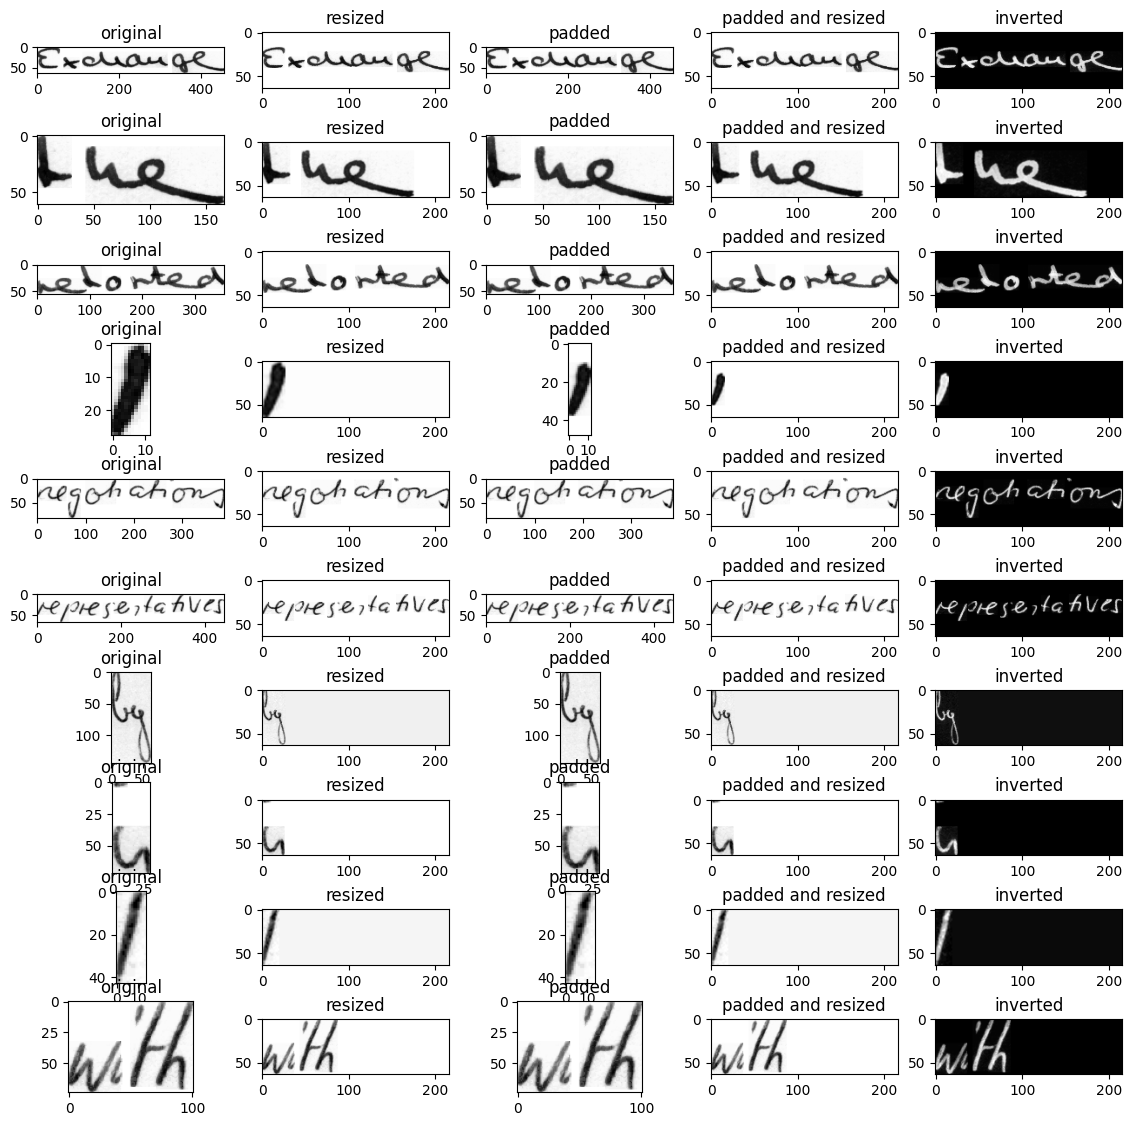

In [453]:
fig = plt.figure(figsize=(14,14))
columns = 5
rows = 10

ax = []
INPUT_SIZE = (216, 64, 1)
i = 0
idx = 0
while i < rows*columns:
    img = cv2.imread(img_paths[idx], cv2.IMREAD_GRAYSCALE)
    img_pad = img_padding(img, INPUT_SIZE[1])
    img_res = resize(img, INPUT_SIZE)
    img_res_pad = resize(img_pad, INPUT_SIZE)
    inverted_res_pad = 255 - img_res_pad
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns,i+1) )
    ax[-1].set_title("original")  # set title
    plt.imshow(img, cmap='gray')
    
    ax.append( fig.add_subplot(rows, columns, i + 2 ))
    ax[-1].set_title("resized")  # set title
    plt.imshow(img_res, cmap='gray')

    ax.append( fig.add_subplot(rows, columns, i + 3 ))
    ax[-1].set_title("padded")  # set title
    plt.imshow(img_pad, cmap='gray')

    ax.append( fig.add_subplot(rows, columns, i + 4 ))
    ax[-1].set_title("padded and resized")  # set title
    plt.imshow(img_res_pad, cmap='gray')

    ax.append( fig.add_subplot(rows, columns, i + 5 ))
    ax[-1].set_title("inverted")  # set title
    plt.imshow(inverted_res_pad, cmap='gray')

    i += columns
    idx += 1
plt.show()

0.453125
0.46875
0.5
0.484375
0.8125
2.125
1.203125
2.265625


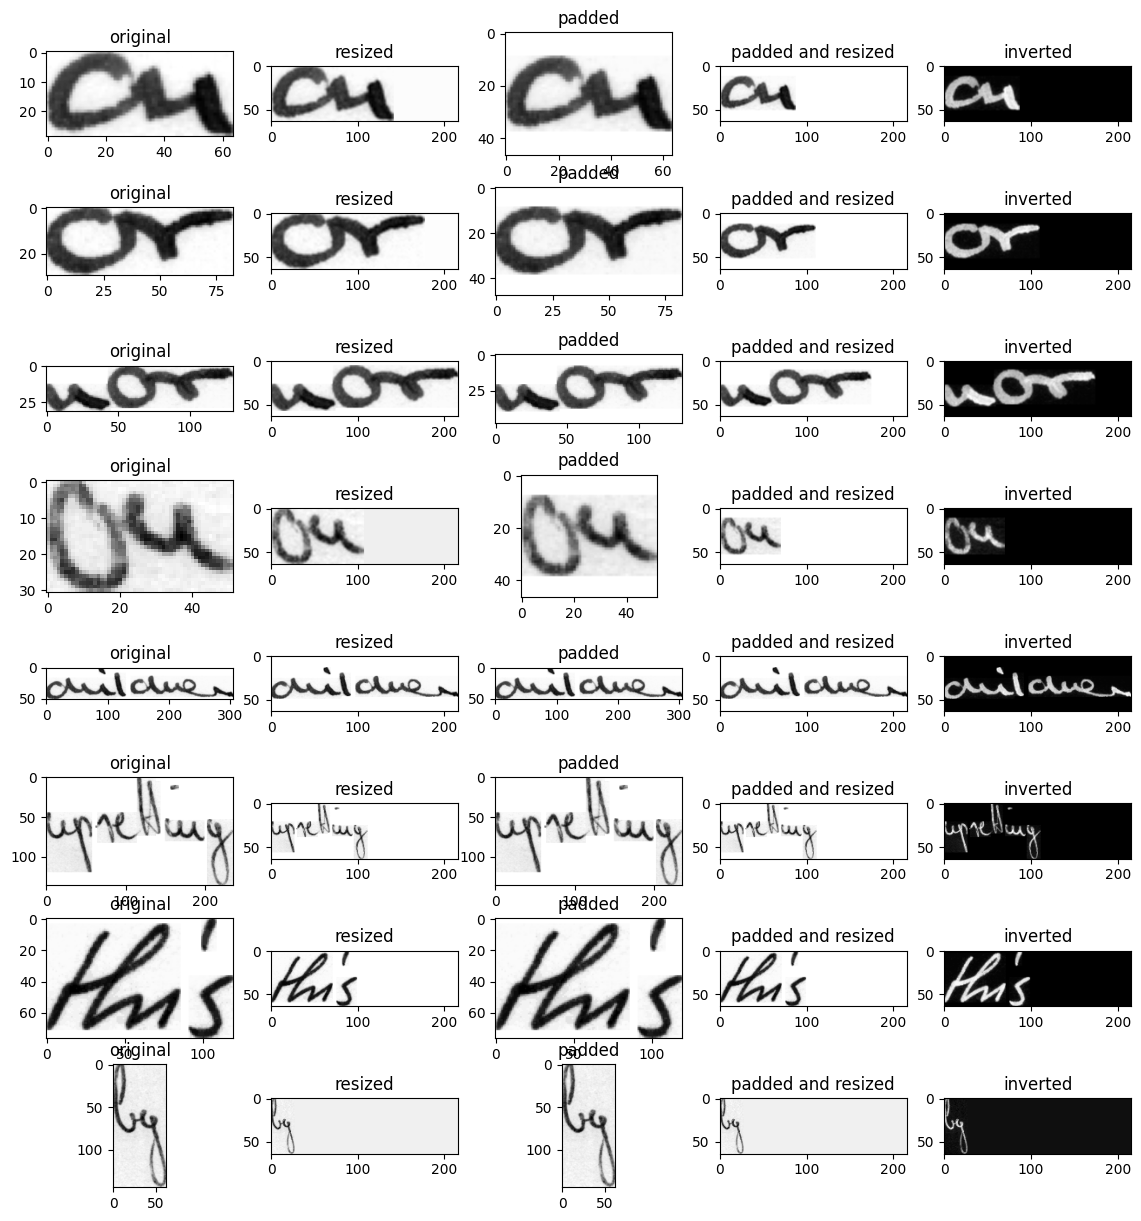

In [457]:
affected_imgs = ['../raw/iam/words/a01/a01-063u/a01-063u-00-05.png', 
                 '../raw/iam/words/a01/a01-072u/a01-072u-07-02.png', 
                 '../raw/iam/words/a01/a01-113u/a01-113u-05-00.png', 
                 '../raw/iam/words/a01/a01-072x/a01-072x-00-07.png',
                 '../raw/iam/words/a01/a01-122u/a01-122u-01-03.png',
                 '../raw/iam/words/a01/a01-072x/a01-072x-06-05.png',
                 '../raw/iam/words/a01/a01-122/a01-122-01-08.png',
                 '../raw/iam/words/a01/a01-000x/a01-000x-04-06.png']

fig = plt.figure(figsize=(14,15))
columns = 5
rows = 8

ax = []
INPUT_SIZE = (216, 64, 1)
i = 0
idx = 0
while i < rows*columns:
    img = cv2.imread(affected_imgs[idx], cv2.IMREAD_GRAYSCALE)
    img_pad = img_padding(img, INPUT_SIZE[1])
    img_res = resize(img, INPUT_SIZE)
    img_res_pad = resize(img_pad, INPUT_SIZE)
    inverted_res_pad = 255 - img_res_pad
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns,i+1) )
    ax[-1].set_title("original")  # set title
    plt.imshow(img, cmap='gray')
    
    ax.append( fig.add_subplot(rows, columns, i + 2 ))
    ax[-1].set_title("resized")  # set title
    plt.imshow(img_res, cmap='gray')

    ax.append( fig.add_subplot(rows, columns, i + 3 ))
    ax[-1].set_title("padded")  # set title
    plt.imshow(img_pad, cmap='gray')

    ax.append( fig.add_subplot(rows, columns, i + 4 ))
    ax[-1].set_title("padded and resized")  # set title
    plt.imshow(img_res_pad, cmap='gray')

    ax.append( fig.add_subplot(rows, columns, i + 5 ))
    ax[-1].set_title("inverted")  # set title
    plt.imshow(inverted_res_pad, cmap='gray')

    i += columns
    idx += 1
plt.savefig(f"./preproc_steps.png", dpi=300, bbox_inches="tight")

plt.show()